In [1]:
# INIT
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as n
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True,reshape = False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Neural network with TensorFlow

## Definition
Neural networks are part of machine learning topic. As well they are aimed to make a link between input and output data. However they distinguish by the possibility to customize as desired the model when classical machine learning models only allow some optimatization playing with few parameters.  

A neural network is composed of a hierarchical level sequence:
    - First level: raw data
    - last level: predict values
    - Between these levels are neural layers 

A neuron represents typically a linear operation often coupled with an activation function. These linear operations are matrix operations: \begin{equation*}Y=WX+B\end{equation*}
**X** represents input data (raw data or or output of neurons of the previous layer)  
**Y** represents neuron output  
**W** weight matrix  
**B** bias matrix  

Activation functions are applied on neurons output.

### Activation functions
There are different kind. During several years the sigmoid function was widely used, thinking that it modelizes well the biology.  
\begin{equation*}f(x) = \frac{1}{1+e^{-x}}\end{equation*}


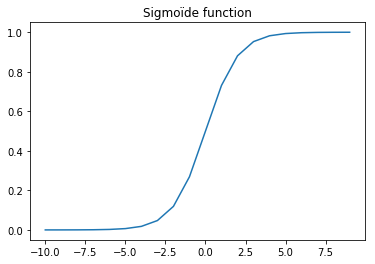

In [3]:
x = n.arange(-10,10,1)
plt.plot(x,1/(1+n.exp(-x)),"-")
plt.title("Sigmoïde function")
plt.show()

La fonction sigmoîde présente deux asymptotes horizontales en -+ l'infini tendant vers 0 et 1. Et cette forme particulière limite l'optimization du aux gradients quasi-nul aux abords de 0 et de 1.

Une autre fonction plus adaptée est la fonction RELU qui est nulle pour x négatif et croissante linéairement pour x positif. Il a été constaté que cette fonction d'activation est bien plus performante que la fonction sigmoïde et est donc majoritairement utilisé. 

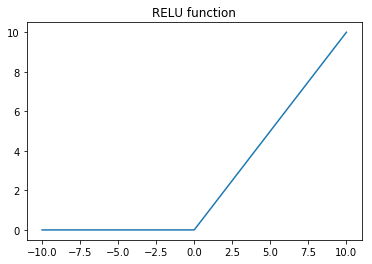

In [4]:
x = [-10,0,10]
y = [0,0,10]
plt.plot(x,y,"-")
plt.title("RELU function")
plt.show()

## Tensorflow
### Définition
Tensorflow est une librairie implémentée par GOOGLE permettant de mettre en place entre autre des réseaux de neurones.
Le principe de cette librairie est la réalisation du calcul en deux étapes:
    - la première étape concerne la définition de toutes les étapes de calculs, la création des variables... mais sans executer aucun calculs
    - la seconde étape concerne l'execution du calcul
L'avantage de séparer l'architecture du calcul de son exécution permet lors de son execution de pouvoir très simplement distribué le calcul.

### 1er réseau
On va se concentrer sur un problème assez basique qui est la résolution d'équation.
Nous avons donc deux vecteurs de même dimension:
    - x = [1,2,3,4,5]
    - y = [5,6,7,8,9]
L'idée est de trouvé les coefficients **w** et **b** qui permettent de trouver y en fonction de x.
Nous allons donc commencer par creer l'architecture de calcul.

In [2]:
# Définition des variables
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
w = tf.Variable([3.0])
b = tf.Variable([-3.0])

# Opérations
res = w*x+b
loss = tf.reduce_sum(tf.square(res-y))

# Résolutions
opt = tf.train.GradientDescentOptimizer(0.01)
train = opt.minimize(loss)

On a donc défini nos variables et l'architecture de calcul. **X** et **Y** sont des variables un peu spéciales qui ne seront affectés qu'au lancement du calcul.
**w** et **b** ont été initialisée à une valeur au hasard.
**loss** est une fonction de cout. La résolution des équations sera basée sur la minimisation de cette fonction.
L'algorithme de resolution choisi est basé sur la minimisation des gradients.

A présent nous pouvons donc executer le calcul. Celui-ci est réalisé dans une session.

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
# Entrainement de train sur les données x et y
for _ in range(1000):
    sess.run(train,{x:[2],y:[10]})
# Résultats
print(sess.run([w,b]))
print(sess.run(loss,{x:[2],y:[10]}))


[array([ 5.79999733], dtype=float32), array([-1.59999788], dtype=float32)]
8.18545e-12


On aboutit à la détmermination des coefficients w et b pour les séries x et y. Ces coefficients sont obtenues avec une précision de 10E-11

##  Construction d'un réseau
### Définition
Nous allons nous intéressé cette fois à la reconnaissance d'image. Nous avons une liste de plusieurs milliers d'image de chiffre écrit à la main en noir sur fond blanc. Nous allons essayer de mettre en place un modèle capable de lire ces images.
Nous allons utiliser la base de donnée MNIST. Les images sont de la dimension suivante 28x28=784px

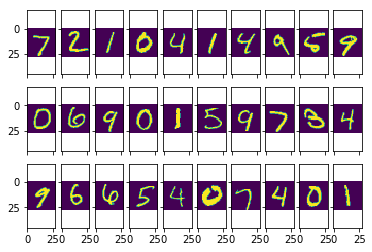

In [47]:
plt.figure()
Nmax = 10
N = 30
l = int(N/Nmax)
fig, axes = plt.subplots(l,Nmax,sharex="all",sharey="all")
c = -1
for ii in range(l):
    for i in range(Nmax):
        c+=1
        axes[ii,i].imshow(n.squeeze(mnist.test.images[c,:,:,:]))
plt.show()

### Niveau 1 : Réseau basique à une couche de 10 neurones
Chaque image fait 784 pixels et nous avons 10 sorties possible pour chaque chiffre.
La mention one-hot fait référence à la manière dont on représente le vecteur de sortie. One hot signifie que nous avons un vecteur de la taille du nombre de classe possible. Tous les éléments sont à 0 sauf la bonne classe qui est à 1 :

5 : [0,0,0,0,0,1,0,0,0,0]

Pour cette première étape nous allons faire le réseau le plus basique, c'est à dire une couche de 10 neurones qui permettront de faire la transition 784 -> 10

In [3]:
# Variables
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
x = tf.placeholder(tf.float32,[None,28,28,1])
yt = tf.placeholder(tf.float32,[None,10])
init = tf.global_variables_initializer()
# Operations
y = tf.nn.softmax(tf.matmul(tf.reshape(x,[-1,784]),w)+b)
loss = -tf.reduce_sum(yt*tf.log(y))
# Train
opt = tf.train.GradientDescentOptimizer(0.003)
trainstep = opt.minimize(loss)
# Res
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y,1),tf.argmax(yt,1)),tf.float32))

La fonction softmax est en général l'ultime étape du réseau. Il s'agit d'une normalisation exponentielle permettant d'afficher la sortie sous forme de probabilité et d'exagérer les différences.
\begin{equation*}\frac{e^{Ln}}{\sum{e^L}}\end{equation*}
Nous pouvons enchainer par la seconde étape qui est l'exécution du calcul par l'intermédaire d'une session.

In [4]:
# Calculation
sess = tf.Session()
sess.run(init)
acc = list()
los = list()
for _ in range(5000):
    bx,by = mnist.train.next_batch(100)
    sess.run(trainstep,{x:bx,yt:by})
    feed_data = {x:mnist.test.images,yt:mnist.test.labels}
    acc.append(sess.run(accuracy,feed_data))
    los.append(sess.run(loss,feed_data))
sess.close()

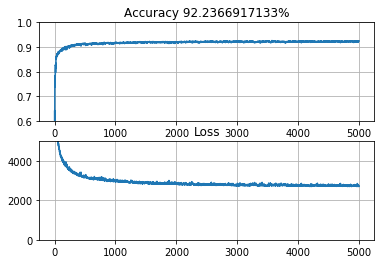

In [5]:
# Resultats
plt.figure()
plt.subplot(211)
plt.title("Accuracy "+str(n.mean(acc[-100:])*100) + "%")
plt.plot(acc,"-")
plt.ylim(0.6,1)
plt.grid()
plt.subplot(212)
plt.title("Loss")
plt.plot(los,"-")
plt.ylim(0,5000)
plt.grid()
plt.show()

A l'aide de ce réseau basique, nous obtenons une performance de l'ordre de 92%. Voyons si on peut faire mieux.
### 2eme étape : Réseau multicouche
Nous allons à présent de voir l'impact d'ajouter plusieurs couche de neurone dans notre réseau.
Nous allons définir le réseau suivant:
    - Données brutes : 784 neurones
    - Niveau 1 : 200 neurones
    - Niveau 2 : 100 neurones
    - Niveau 3 : 60 neurones
    - Niveau 4 : 30 neurones
    - Niveau 5 : 10 neurones
Comme précedemment le dernier niveau est associé à la fonction softmax de normalisation exponentielle.  
On initialisera les poids à des valeurs aléatoires pour des questions de stabilité de l'algorithme d'entrainement. 

In [8]:
# Variables
w1 = tf.Variable(tf.truncated_normal([784,200],stddev=0.1))
b1 = tf.Variable(tf.zeros([200]))
w2 = tf.Variable(tf.truncated_normal([200,100],stddev=0.1))
b2 = tf.Variable(tf.zeros([100]))
w3 = tf.Variable(tf.truncated_normal([100,60],stddev=0.1))
b3 = tf.Variable(tf.zeros([60]))
w4 = tf.Variable(tf.truncated_normal([60,30],stddev=0.1))
b4 = tf.Variable(tf.zeros([30]))
w5 = tf.Variable(tf.truncated_normal([30,10],stddev=0.1))
b5 = tf.Variable(tf.zeros([10]))
x = tf.placeholder(tf.float32,[None,28,28,1])
yt = tf.placeholder(tf.float32,[None,10])
init = tf.global_variables_initializer()
# Operations
y1 = tf.matmul(tf.reshape(x,[-1,784]),w1)+b1
y2 = tf.matmul(y1,w2)+b2
y3 = tf.matmul(y2,w3)+b3
y4 = tf.matmul(y3,w4)+b4
y = tf.nn.softmax(tf.matmul(y4,w5)+b5)
loss = -tf.reduce_sum(yt*tf.log(y))
# Train
opt = tf.train.GradientDescentOptimizer(0.001)
trainstep = opt.minimize(loss)
# Res
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y,1),tf.argmax(yt,1)),tf.float32))

In [9]:
# Calculation
sess = tf.Session()
sess.run(init)
acc = list()
los = list()
for _ in range(5000):
    bx,by = mnist.train.next_batch(100)
    sess.run(trainstep,{x:bx,yt:by})
    feed_data = {x:mnist.test.images,yt:mnist.test.labels}
    acc.append(sess.run(accuracy,feed_data))
    los.append(sess.run(loss,feed_data))
sess.close()

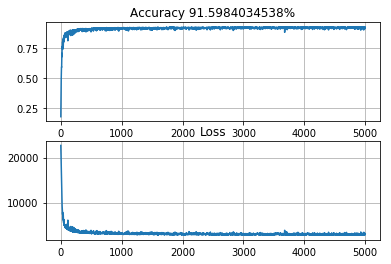

In [10]:
# Resultats
plt.figure()
plt.subplot(211)
plt.title("Accuracy "+str(n.mean(acc[-100:])*100) + "%")
plt.plot(acc,"-")
#plt.ylim(0.6,1)
plt.grid()
plt.subplot(212)
plt.title("Loss")
plt.plot(los,"-")
#plt.ylim(0,50)
plt.grid()
plt.show()

Here we have reduced the learning rate to make the calculation converging
Nous avons réduit ici le taux d'apprentissage de 0.003 à 0.001 pour que le calcul converge. Ce taux lorsqu'il est trop grand ne permet pas de converger vers la solution car les poids sont modifier de façon trop grossière. A l'inverse un taux d'apprentissage trop petit nécéssite une très longue phase d'entrainement.  
Nous avons complexifier notre modèle pourtant nous n'obtenons pas de meilleur résultat. nous stagnons à la performance de 92%. 
Voyons ce que l'on obtient en combinant nos neurones avec une fonction d'activation de type sigmoide.

In [2]:
# Variables
w1 = tf.Variable(tf.truncated_normal([784,200],stddev=0.1))
b1 = tf.Variable(tf.zeros([200]))
w2 = tf.Variable(tf.truncated_normal([200,100],stddev=0.1))
b2 = tf.Variable(tf.zeros([100]))
w3 = tf.Variable(tf.truncated_normal([100,60],stddev=0.1))
b3 = tf.Variable(tf.zeros([60]))
w4 = tf.Variable(tf.truncated_normal([60,30],stddev=0.1))
b4 = tf.Variable(tf.zeros([30]))
w5 = tf.Variable(tf.truncated_normal([30,10],stddev=0.1))
b5 = tf.Variable(tf.zeros([10]))
x = tf.placeholder(tf.float32,[None,28,28,1])
yt = tf.placeholder(tf.float32,[None,10])
# Operations
y1 = tf.nn.sigmoid(tf.matmul(tf.reshape(x,[-1,784]),w1)+b1)
y2 = tf.nn.sigmoid(tf.matmul(y1,w2)+b2)
y3 = tf.nn.sigmoid(tf.matmul(y2,w3)+b3)
y4 = tf.nn.sigmoid(tf.matmul(y3,w4)+b4)
y = tf.nn.softmax(tf.matmul(y4,w5)+b5)
loss = -tf.reduce_sum(yt*tf.log(y))
# Train
#opt = tf.train.AdamOptimizer(0.003)
opt = tf.train.GradientDescentOptimizer(0.001)
trainstep = opt.minimize(loss)
# Res
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y,1),tf.argmax(yt,1)),tf.float32))
# Calculation
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
acc = list()
los = list()
for _ in range(20000):
    bx,by = mnist.train.next_batch(100)
    sess.run(trainstep,{x:bx,yt:by})
    feed_data = {x:mnist.test.images,yt:mnist.test.labels}
    acc.append(sess.run(accuracy,feed_data))
    los.append(sess.run(loss,feed_data))
sess.close()

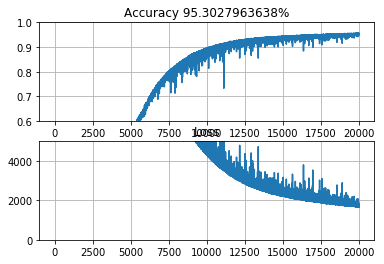

In [5]:
# Res
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y,1),tf.argmax(yt,1)),tf.float32))# Resultats
plt.figure()
plt.subplot(211)
plt.title("Accuracy "+str(n.mean(acc[-100:])*100) + "%")
plt.plot(acc,"-")
plt.ylim(0.6,1)
plt.grid()
plt.subplot(212)
plt.title("Loss")
plt.plot(los,"-")
plt.ylim(0,5000)
plt.grid()
plt.show()

The combination of neurals with activation function allows to reach up to 95% of performance. However we can see that the rising is very slow. It takes much more cycle to converge. It starts to rise significantly after 5000 cycles on the other hand it starts to converge after few cycles of calculation without activation function. It due that the gradient is close to 0 at both end of the sigmoide function.  
Let see now if we can get the model more responsive using another actvation function named RELU. 

In [10]:
# Variables
w1 = tf.Variable(tf.truncated_normal([784,200],stddev=0.1))
b1 = tf.Variable(tf.zeros([200]))
w2 = tf.Variable(tf.truncated_normal([200,100],stddev=0.1))
b2 = tf.Variable(tf.zeros([100]))
w3 = tf.Variable(tf.truncated_normal([100,60],stddev=0.1))
b3 = tf.Variable(tf.zeros([60]))
w4 = tf.Variable(tf.truncated_normal([60,30],stddev=0.1))
b4 = tf.Variable(tf.zeros([30]))
w5 = tf.Variable(tf.truncated_normal([30,10],stddev=0.1))
b5 = tf.Variable(tf.zeros([10]))
x = tf.placeholder(tf.float32,[None,28,28,1])
yt = tf.placeholder(tf.float32,[None,10])
# Operations
y1 = tf.nn.relu(tf.matmul(tf.reshape(x,[-1,784]),w1)+b1)
y2 = tf.nn.relu(tf.matmul(y1,w2)+b2)
y3 = tf.nn.relu(tf.matmul(y2,w3)+b3)
y4 = tf.nn.relu(tf.matmul(y3,w4)+b4)
y = tf.nn.softmax(tf.matmul(y4,w5)+b5)
loss = -tf.reduce_sum(yt*tf.log(y))
# Train
opt = tf.train.GradientDescentOptimizer(0.003)
trainstep = opt.minimize(loss)
# Res
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y,1),tf.argmax(yt,1)),tf.float32))
# Calculation
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
acc = list()
los = list()
for _ in range(10000):
    bx,by = mnist.train.next_batch(100)
    sess.run(trainstep,{x:bx,yt:by})
    feed_data = {x:mnist.test.images,yt:mnist.test.labels}
    acc.append(sess.run(accuracy,feed_data))
    los.append(sess.run(loss,feed_data))
sess.close()

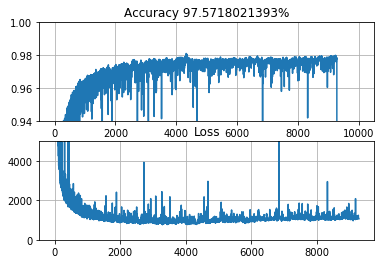

In [11]:
# Res
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y,1),tf.argmax(yt,1)),tf.float32))# Resultats
plt.figure()
plt.subplot(211)
plt.title("Accuracy "+str(n.mean(acc[4200-100:4200])*100) + "%")
plt.plot(acc,"-")
plt.ylim(0.94,1)
plt.grid()
plt.subplot(212)
plt.title("Loss")
plt.plot(los,"-")
plt.ylim(0,5000)
plt.grid()
plt.show()

Using RELU as activation function improves the performance and the number of cycle needed to converge. We get 97.5% of performance after 10000 of cycle.  
One improvment that we could investigate is to implement a decaying learning rate. Indeed at the begining the learning rate should be high to have a quick performance rising. Then the learning rate should be reduced to increase the performance.

In [15]:
# Variables
w1 = tf.Variable(tf.truncated_normal([784,200],stddev=0.1))
b1 = tf.Variable(tf.zeros([200]))
w2 = tf.Variable(tf.truncated_normal([200,100],stddev=0.1))
b2 = tf.Variable(tf.zeros([100]))
w3 = tf.Variable(tf.truncated_normal([100,60],stddev=0.1))
b3 = tf.Variable(tf.zeros([60]))
w4 = tf.Variable(tf.truncated_normal([60,30],stddev=0.1))
b4 = tf.Variable(tf.zeros([30]))
w5 = tf.Variable(tf.truncated_normal([30,10],stddev=0.1))
b5 = tf.Variable(tf.zeros([10]))
x = tf.placeholder(tf.float32,[None,28,28,1])
yt = tf.placeholder(tf.float32,[None,10])
# Operations
y1 = tf.nn.relu(tf.matmul(tf.reshape(x,[-1,784]),w1)+b1)
y2 = tf.nn.relu(tf.matmul(y1,w2)+b2)
y3 = tf.nn.relu(tf.matmul(y2,w3)+b3)
y4 = tf.nn.relu(tf.matmul(y3,w4)+b4)
y = tf.nn.softmax(tf.matmul(y4,w5)+b5)
loss = -tf.reduce_sum(yt*tf.log(y))
global_step = tf.Variable(0, trainable=False)
# Train
learning_rate = tf.train.exponential_decay(0.003, global_step,100, 0.97)
opt = tf.train.GradientDescentOptimizer(learning_rate)
trainstep = opt.minimize(loss,global_step=global_step)
# Res
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y,1),tf.argmax(yt,1)),tf.float32))
# Calculation
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
acc = list()
los = list()
for _ in range(10000):
    bx,by = mnist.train.next_batch(100)
    sess.run(trainstep,{x:bx,yt:by})
    feed_data = {x:mnist.test.images,yt:mnist.test.labels}
    acc.append(sess.run(accuracy,feed_data))
    los.append(sess.run(loss,feed_data))
sess.close()

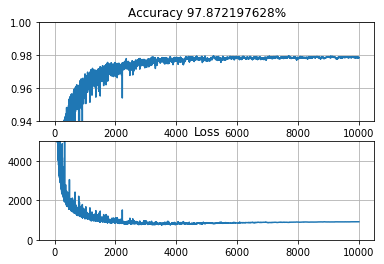

In [20]:
# Res
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y,1),tf.argmax(yt,1)),tf.float32))# Resultats
plt.figure()
plt.subplot(211)
plt.title("Accuracy "+str(n.mean(acc[-100:])*100) + "%")
plt.plot(acc,"-")
plt.ylim(0.94,1)
plt.grid()
plt.subplot(212)
plt.title("Loss")
plt.plot(los,"-")
plt.ylim(0,5000)
plt.grid()
plt.show()

Using the learning rate decay we get approximativeley the same performance but we reduce significantly the noise.
Here we almost reach 98% of performance. Using this model we have lost one important information which is the shape of the 2d image flattening it. One way to keep this infomation in the model is to use convolutional network.

In case of overfitting, we can use a regularization function such as dropout. It set to 0 some neurons taken randomly according to a certain probability. The sense of this function is that some neurons can specialize itself in a wrong way and the global way is corrected thanks to others neurons. Using dropout allows to desactivate some of these neurons at each cycle of train and allows to avoid the phenomena of negative coadaptation.

## Convolutional network
Flattening raw data lead to a loss of information relative to the 2d structure. Convolutional network allows to take into account this information.  
It's realized using small matrices with specific weight and bias reading the image. Each matrix specializes itself recognising some features in the image. When it recognizes nothing the output is close to 0.  
Using convolutional network, input and output data remain 2d. The output of the convolutional network is then flattened and becomes the input of a classical neural network which is called fully connected layers.  
We will try this kind of network on the previous test case. So we have images 24x24 with 1 color (could be 3).  
We can play on several parameter customizing the matrix:
    - Size of the matrix, for instance 5x5
    - Stride which means how many pixel are skipped when the matrix is moving. If it is 1, input and output have the same size. 
    - Number of matrix to apply which gives the same number of output field

Let see an example. We have an input image of 28x28:
    - First layer we apply 4 matrices 5x5 with a stride of 1. It gives 4 output fields of 28x28.
    - Second layer we apply 8 matrices on the 4 fields 28x28 with a stride of 2. It gives 8 output fields of 14x14.
    - Third layer we apply 12 matrices on the 8 fields 14x14 with a stride of 2. It gives 12 output fields of 7x7
Increasing the number of matrices allows to catch more information.  
Let's implement it.

In [57]:
import sys
# Variables
K = 6
L = 12
M = 24
N = 200
w1 = tf.Variable(tf.truncated_normal([6,6,1,K],stddev=0.1))
b1 = tf.Variable(tf.ones([K])/10)
w2 = tf.Variable(tf.truncated_normal([5,5,K,L],stddev=0.1))
b2 = tf.Variable(tf.ones([L])/10)
w3 = tf.Variable(tf.truncated_normal([4,4,L,M],stddev=0.1))
b3 = tf.Variable(tf.ones([M])/10)
w4 = tf.Variable(tf.truncated_normal([7*7*M,N],stddev=0.1))
b4 = tf.Variable(tf.ones([N])/10)
w5 = tf.Variable(tf.truncated_normal([N,10],stddev=0.1))
b5 = tf.Variable(tf.ones([10])/10)
x = tf.placeholder(tf.float32,[None,28,28,1])
yt = tf.placeholder(tf.float32,[None,10])
pkeep = 0.75
# Operations
y1 = tf.nn.relu(tf.nn.conv2d(x,w1,strides=[1,1,1,1],padding='SAME')+b1)
y2 = tf.nn.relu(tf.nn.conv2d(y1,w2,strides=[1,2,2,1],padding='SAME')+b2)
y3 = tf.nn.relu(tf.nn.conv2d(y2,w3,strides=[1,2,2,1],padding='SAME')+b3)
yy = tf.reshape(y3,shape=[-1,7*7*M])
y4 = tf.nn.relu(tf.matmul(yy,w4)+b4)
y = tf.nn.softmax(tf.matmul(y4,w5)+b5)
loss = -tf.reduce_sum(yt*tf.log(y))
global_step = tf.Variable(0, trainable=False)
# Train
learning_rate = tf.train.exponential_decay(0.003, global_step,100, 0.95)
#learning_rate = 0.003
opt = tf.train.GradientDescentOptimizer(learning_rate)
trainstep = opt.minimize(loss,global_step=global_step)
# Res
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y,1),tf.argmax(yt,1)),tf.float32))
# Calculation
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
acc = list()
los = list()
for i in range(10000):
    bx,by = mnist.train.next_batch(100)
    sess.run(trainstep,{x:bx,yt:by})
    feed_data = {x:mnist.test.images,yt:mnist.test.labels}
    acc.append(sess.run(accuracy,feed_data))
    los.append(sess.run(loss,feed_data))
    sys.stdout.write('\r'+str(i))
sess.close()

9999

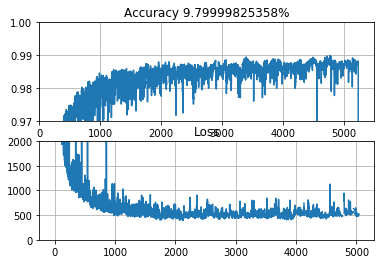

In [56]:
# Res
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y,1),tf.argmax(yt,1)),tf.float32))# Resultats
plt.figure()
plt.subplot(211)
NN = 7000
plt.title("Accuracy "+str(n.mean(acc[NN-100:NN])*100) + "%")
plt.plot(acc,"-")
plt.xlim(0,5500)
plt.ylim(0.97,1)
plt.grid()
plt.subplot(212)
plt.title("Loss")
plt.plot(los,"-")
plt.ylim(0,2000)
plt.grid()
plt.show()